In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
# 1. Read the data
data = pd.read_csv('up_down_mean.csv')  # Replace with your file name
temperature1 = data['Temature'].values
wavelength1 = data['mean_wavelength_1'].values

temperature2 = data['Temature'].values
wavelength2 = data['mean_wavelength_2'].values

In [5]:
# 2. Data collation
# Calculate wavelength change (Δλ) and temperature change (ΔT)
delta_lambda1 = np.diff(wavelength1)
delta_temperature1 = np.diff(temperature1)

delta_lambda2 = np.diff(wavelength2)
delta_temperature2 = np.diff(temperature2)
print(delta_lambda1,delta_temperature1,delta_lambda2,delta_temperature2)

[-0.13719435 -0.14225469 -0.14744871 -0.07500712 -0.2368006  -0.11744785] [-10 -10 -10 -10 -10 -10] [-0.12691075 -0.12370017 -0.12331088 -0.1291384  -0.16786507 -0.14622871] [-10 -10 -10 -10 -10 -10]


1: y = 1544.81 + 0.014264 * X1
2: y = 1549.60 + 0.013543 * X1


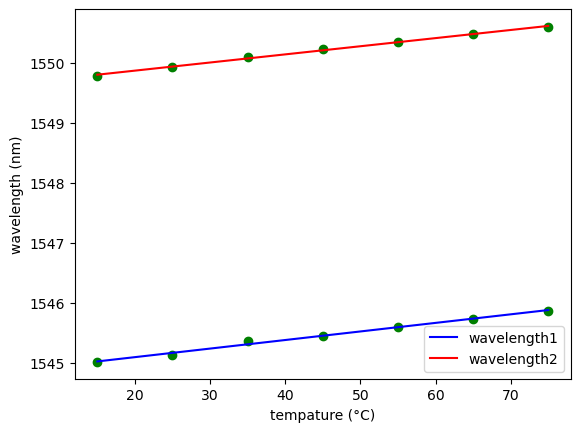

In [7]:
# 3. Linear regression
X1 = temperature1.reshape(-1, 1)
y1 = wavelength1
model1 = LinearRegression()
model1.fit(X1, y1)
predicted1 = model1.predict(X1)

beta_0 = model1.intercept_
beta_1 = model1.coef_[0]
print(f"1: y = {beta_0:.2f} + {beta_1:.6f} * X1")

X2 = temperature2.reshape(-1, 1)  
y2 = wavelength2
model2 = LinearRegression()
model2.fit(X2, y2)
predicted2 = model2.predict(X1)

beta_2 = model2.intercept_
beta_3 = model2.coef_[0]
print(f"2: y = {beta_2:.2f} + {beta_3:.6f} * X1")

plt.scatter(temperature1, wavelength1, color='green')
plt.scatter(temperature2, wavelength2, color='green')
plt.plot(temperature1, predicted1, color='blue', label='wavelength1')
plt.plot(temperature2, predicted2, color='red', label='wavelength2')
plt.xlabel('tempature (°C)')
plt.ylabel('wavelength (nm)')

plt.legend()
plt.show()

In [9]:
# 4. 灵敏度计算
sensitivity1 = delta_lambda1 / delta_temperature1/1545
average_sensitivity1 = np.mean(sensitivity1)
print(f"sentivity1: {average_sensitivity1:.10f} nm/°C")

sensitivity2 = delta_lambda2 / delta_temperature2/1550
average_sensitivity2 = np.mean(sensitivity2)
print(f"sentivity2: {average_sensitivity2:.10f} nm/°C")

sentivity1: 0.0000092357 nm/°C
sentivity2: 0.0000087866 nm/°C


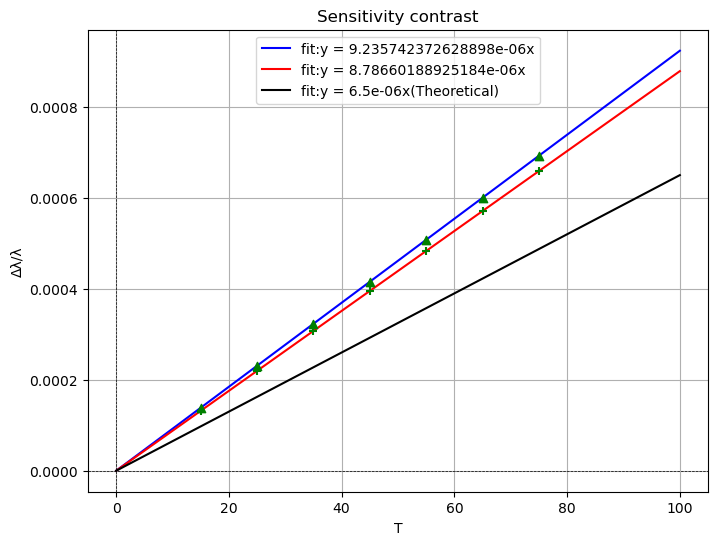

In [11]:
# 5. Generated lines over (0,0)
slope1 = average_sensitivity1  
slope2 = average_sensitivity2
slope3 = 0.0000065


x_slope = np.linspace(0, 100)  


y_slope_1 = slope1 * x_slope  # y = mx
y_siope_2 = slope2 * x_slope
y_siope_3 = slope3 * x_slope


plt.figure(figsize=(8, 6))


plt.plot(x_slope, y_slope_1, label=f'fit:y = {slope1}x', color='blue')
plt.plot(x_slope, y_siope_2, label=f'fit:y = {slope2}x', color='red')
plt.plot(x_slope, y_siope_3, label=f'fit:y = {slope3}x(Theoretical)', color='black')


delta_lambda_over_lambda1 = [slope1 * t for t in temperature1]  
delta_lambda_over_lambda2 = [slope2 * t for t in temperature2]  


plt.title('Sensitivity contrast')
plt.xlabel('T')
plt.ylabel('Δλ/λ')


plt.grid()

plt.scatter(temperature1, delta_lambda_over_lambda1, color='green',marker='^', zorder=5)
plt.scatter(temperature2, delta_lambda_over_lambda2, color='green',marker='+', zorder=5)



plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')


plt.legend()


plt.show()